In [300]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import pickle

In [301]:
df = pd.read_csv('../Resultados/df_train.csv')
df

,row_id,rating_num,competitionId,player_position_1,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,...,team2_other_ratio_var_47,team2_other_ratio_var_49,team2_other_ratio_var_50,team2_other_ratio_var_51,team2_offensive_derived_var_0,team2_defensive_derived_var_2,team2_offensive_derived_var_11,team2_offensive_derived_var_16,winner_categorical,team_categorical
0,1,7.0,8,7.0,0.317073,0.48,0.0,0,0.0,0.0,...,0.250,0.375,0.354167,0.184211,0.043518,0.442560,0.131548,0.034157,2,0
1,3,6.5,8,3.0,0.463415,0.42,0.0,0,0.0,0.0,...,0.167,0.325,0.416667,0.210526,0.065387,0.705081,0.173697,0.054034,1,1
2,4,8.5,5,11.0,0.682927,0.44,0.0,0,0.0,0.0,...,0.286,0.275,0.437500,0.342105,0.347284,0.328158,0.250756,0.219441,1,0
3,5,8.0,4,17.0,0.682927,0.58,0.0,0,0.0,0.0,...,0.200,0.500,0.312500,0.236842,0.121939,0.551021,0.155969,0.095201,1,1
4,7,3.5,5,10.0,0.731707,0.70,0.0,0,0.0,0.0,...,0.400,0.175,0.458333,0.473684,0.119671,0.395780,0.199050,0.128719,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16811,29220,7.5,5,3.0,0.317073,0.34,0.0,0,0.0,0.0,...,0.000,0.275,0.354167,0.263158,0.221859,0.466849,0.181465,0.074192,1,1
16812,29223,6.0,11,4.0,0.390244,0.32,0.0,0,0.0,0.0,...,0.182,0.625,0.312500,0.131579,0.337766,0.595243,0.240326,0.171927,2,1
16813,29224,5.0,7,5.0,0.268293,0.30,0.0,0,0.0,0.0,...,0.375,0.125,0.500000,0.552632,0.488050,0.480902,0.248870,0.296820,1,0
16814,29226,6.0,8,5.0,0.463415,0.46,0.0,0,0.0,0.0,...,0.222,0.450,0.354167,0.131579,0.143732,0.405346,0.190395,0.108018,1,0


In [302]:
y = df['rating_num']
X = df.drop(['rating_num', 'row_id'], axis=1)

In [303]:
#PCA

# scaling=StandardScaler()
# scaling.fit(X)
# Scaled_data=scaling.transform(X)
 
# principal=PCA(n_components=50)
# principal.fit(Scaled_data)
# X_PCA=principal.transform(Scaled_data)
 
# X_PCA.shape

In [304]:
# print(principal.explained_variance_ratio_)

In [305]:
# columns = list(X)
# print(columns)

In [306]:
# X = X.values #returns a numpy arrayX
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scaled = min_max_scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled)
# X_scaled.columns = columns

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


params = {
    "n_estimators": 300, #250-quase ok, 300-ok, 275, 400 e 500
    "max_depth": 3,  #ok
    "min_samples_split": 5, #ok
    "learning_rate": 0.1, #ok   
    "loss": "squared_error",
}

In [308]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

r2_score = r2_score(y_test, reg.predict(X_test))
print("The R2 on test set: {:.10f}".format(r2_score))

The R2 on test set: 0.1873033916


c:\Users\Dell\Apps\venvs\.sevilla\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


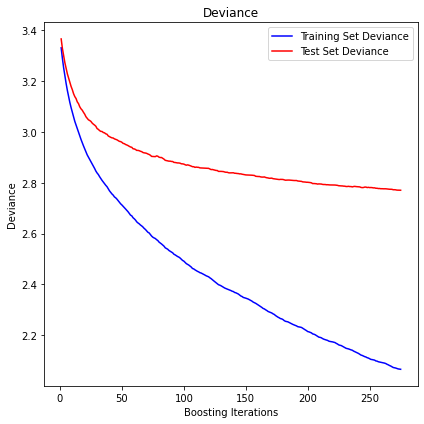

In [309]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [310]:
#print contagem de cores para processamento em paralelo e os parâmetros atuais do modelo default
n_jobs = os.cpu_count()
print(n_jobs)
print(reg.get_params)

4
<bound method BaseEstimator.get_params of GradientBoostingRegressor(min_samples_split=5, n_estimators=275)>


In [311]:
#hyperparameter tuning do modelo XGBoost

# param_grid = {'learning_rate': [0.01, 0.05, 0.1],
#               'n_estimators': [400, 500, 600],
#               #'min_samples_split': [4, 5, 6], 
#               #'max_depth': [3, 4, 5],
#              }
    
# grid_xgb = GridSearchCV(estimator = reg, param_grid = param_grid, n_jobs = n_jobs, scoring = 'r2',
#                         cv = 10, refit = True, verbose = 1)
# grid_xgb.fit(X_train,y_train)
# print(grid_xgb.best_params_)
# print(grid_xgb.best_score_)

In [312]:
test = pd.read_csv('../Resultados/df_test.csv')
row_id = test['row_id']
test.drop(['row_id'], axis=1, inplace=True)
test

,competitionId,player_position_1,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,...,team2_other_ratio_var_47,team2_other_ratio_var_49,team2_other_ratio_var_50,team2_other_ratio_var_51,team2_offensive_derived_var_0,team2_defensive_derived_var_2,team2_offensive_derived_var_11,team2_offensive_derived_var_16,winner_categorical,team_categorical
0,7.0,4.0,0.317073,0.44,0.0,0,0.803922,0.0,0.114754,0.00,...,0.143,0.475,0.437500,0.210526,0.261851,0.410082,0.190509,0.114849,0,0
1,9.0,11.0,0.560976,0.60,0.0,0,0.000000,0.0,0.229508,0.00,...,0.300,0.400,0.354167,0.447368,0.110626,0.480708,0.198072,0.105279,0,0
2,10.0,19.0,0.195122,0.30,0.0,0,0.000000,0.0,0.049180,0.25,...,0.000,0.200,0.312500,0.263158,0.111857,0.566491,0.177065,0.062118,1,1
3,11.0,3.0,0.341463,0.30,0.0,0,0.000000,0.0,0.073770,0.00,...,0.333,0.175,0.395833,0.289474,0.875466,0.365160,0.313902,0.294538,1,0
4,5.0,4.0,0.585366,0.70,0.2,0,0.000000,0.0,0.106557,0.00,...,0.571,0.225,0.479167,0.394737,0.055944,0.445935,0.191068,0.090986,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,7.0,11.0,0.463415,0.60,0.0,0,0.000000,0.0,0.065574,0.00,...,1.000,0.275,0.437500,0.342105,0.594270,0.316127,0.290421,0.341016,1,0
8770,4.0,16.0,0.341463,0.40,0.2,0,0.000000,0.0,0.049180,0.00,...,0.000,0.325,0.375000,0.394737,0.162651,0.555421,0.156339,0.087641,0,0
8771,4.0,1.0,0.439024,0.36,0.0,0,0.000000,0.0,0.040984,0.00,...,0.125,0.200,0.083333,0.447368,0.128139,0.444911,0.182449,0.094133,1,1
8772,10.0,1.0,0.463415,0.54,0.0,0,0.000000,0.0,0.016393,0.00,...,0.500,0.600,0.416667,0.184211,0.036835,0.781462,0.141524,0.045464,2,0


In [313]:
# test = test.values #returns a numpy arrayX
# min_max_scaler = preprocessing.MinMaxScaler()
# test_scaled = min_max_scaler.fit_transform(test)
# test_scaled = pd.DataFrame(test_scaled)
# test_scaled.columns = columns

In [314]:
#PCA

# Scaled_data=scaling.transform(test)
# principal.fit(Scaled_data)
# teste_PCA=principal.transform(Scaled_data)
 
# teste_PCA.shape

In [315]:
pred = reg.predict(test)
pred.shape

(8774,)

In [316]:
pred

array([6.87941285, 6.00779199, 6.24993158, ..., 5.9014844 , 6.5219351 ,
       7.42823416])

In [317]:
submission = pd.DataFrame()
submission['row_id'] = row_id
submission['rating_num'] = pred
submission

,row_id,rating_num
0,14785,6.879413
1,15125,6.007792
2,13095,6.249932
3,6079,6.057248
4,16584,6.865437
...,...,...
8769,21259,5.071436
8770,9371,8.254025
8771,23226,5.901484
8772,26623,6.521935


In [318]:
submission.to_csv('../Resultados/submission-17.csv', index=False)

In [319]:
pickle.dump(reg, open('modelo_xgboost', 'wb'))